# Homework 02 --- Session 3, Multilinear regression

## EX 1 Artificial data (25pt -- 5+5+5+10)
### Dataset 'H31.csv'
### Tasks:
Consider a multivariate regression of the output variable $y$ over the 3 regressors $x_1$, $x_2$, $x_3$ as follows.
* (a) Which one of the regressors serves as dummy variable corresponding to an intercept term?
    * Ignore the first column since it's just a duplicate index (You can avoid it by running **ex1 = pd.read_csv('H31.csv', index_col=0)** )
* (b) Calculate the coefficients $\hat w$ manually or with python *numpy* module by using matrix computation.
* (c) Verify your answer by implementing the OLS regression function with python *statsmodels* module.
* (d) Visualize the data points and your fitted model in a 3D plot, like we did in the lab session.

In [1]:
from __future__ import print_function
import numpy as np   # basic numeric module in python, for array and matrix computation
import pandas as pd  # advanced numeric module, excels in data frame analysis
import matplotlib.pyplot as plt  # for data visualization
%pylab inline
# so the plots are embedded in notebook rather than a stand alone window

from mpl_toolkits.mplot3d import Axes3D  # for 3D plot
import statsmodels.formula.api as smf    # for OLS regression

Populating the interactive namespace from numpy and matplotlib


(a) Which one of the regressors serves as dummy variable corresponding to an intercept term?

### x3 serves as dummy variable corresponding to an intercept term.

In [2]:
ex1 = pd.read_csv('data/H31.csv', index_col=0) 

In [3]:
ex1

,y,x1,x2,x3
1,0,1,-2,1
2,2,-1,-1,1
3,2,0,0,1
4,3,-1,1,1
5,3,1,2,1


(b) Calculate the coefficients ŵ  manually or with python numpy module by using matrix computation.

In [4]:
X = np.matrix(ex1.loc[:,['x3','x1','x2']])
Y = np.matrix(ex1.y).T
w = (X.T * X).I * X.T * Y
print(w)

[[ 2. ]
 [-0.5]
 [ 0.7]]


(c) Verify your answer by implementing the OLS regression function with python statsmodels module.

In [5]:
lm1 = smf.ols(formula = 'y ~ x1 + x2', data = ex1).fit()
print('R2 = %f'%lm1.rsquared)
print(lm1.params)

R2 = 0.983333
Intercept    2.0
x1          -0.5
x2           0.7
dtype: float64


In [6]:
# Compare the coefficients obtained through different methods
pd.DataFrame({'Matrix_Computation':w.tolist(), 'Regression':lm1.params})

,Matrix_Computation,Regression
Intercept,[2.0],2.0
x1,[-0.5],-0.5
x2,[0.7],0.7


(d) Visualize the data points and your fitted model in a 3D plot, like we did in the lab session.

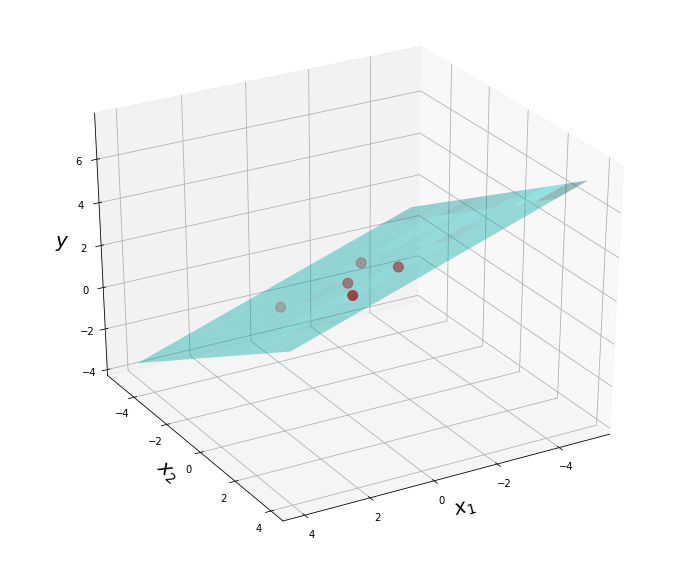

In [7]:
fig = plt.figure(figsize = (12,10))
ax = fig.gca(projection='3d')
ax.scatter(ex1.x1, ex1.x2, ex1.y, s = 100,  color = 'r')
# Generate coordinates for hyperplane
radius = 5
x1, x2 = np.meshgrid(range(-radius,radius), range(-radius,radius))
fit_y = lm1.params[0] + lm1.params[1] * x1 + lm1.params[2] * x2

# alpha (between 0 and 1) controls the transparency with 0 being totally transparent
ax.plot_surface(x1, x2, fit_y, color='c', alpha = 0.4)
# Set labels and fontsize
ax.set_xlabel('$x_1$', fontsize = 20)
ax.set_ylabel('$x_2$', fontsize = 20)
ax.set_zlabel('$y$', fontsize = 20)
ax.view_init(azim = 60)

## EX 2, Income vs Insurance coverage (35+10pt -- 10+10+5+10+10)
### Dataset 'IncomeInsReg.csv'
You are given the demographic data of insurance coverage in NYC, with the details:
* Zip code
* Per capita income
* Total population (for each zip code)
* Population with Insurance coverage
    * Population with Public Insurance coverage
    * Population with Private Insurance coverage
* Population with No Insurance coverage

### Tasks:
* (a) Verify that there are some people with BOTH public insurance and private insurance according to this data set, then create a new column containing such information
* (b) Modify the old data frame, or simply create a new one, such that this data frame contains (including but not limited to) the following information in each zipcode area:
    * IncomePerCapita
    * Total Population
    * Population with Public Insurance coverage ONLY
    * Population with Private Insurance coverage ONLY
    * Population with NO Insurance coverage
    * Population with BOTH types of Insurance coverage
* (c) Drop rows with NaN (if any) and convert all population counts into proportions (percentage of total population, with the form 58.3 instead of 0.583)
* (d) Regress over these proportions (the ones mentioned in part b, leave out "No Insurance Coverage") to predict income -- What interesting results do we have here? Briefly state what you've obtained.
#### Extra credit:
* (e) Visualize the observed income versus the predicted income, like what we did in the lab session. Does this fitted line look great or not? If you're not sure, check the correlation matrix and make a guess.

In [8]:
ex2 = pd.read_csv('data/IncomeInsReg.csv') 

In [9]:
ex2.head()

,Zipcode,IncomePerCapita,TotalPop,WithCoverage,Public,Private,NoCoverage
0,10001,77512.0,22767,20809,5800,16795,1958
1,10002,26905.0,79490,70361,40139,35167,9129
2,10003,79088.0,56909,53135,8593,48522,3774
3,10004,98020.0,3024,2780,180,2705,244
4,10005,99633.0,7566,6996,122,6944,570


(a) Verify that there are some people with BOTH public insurance and private insurance according to this data set, 

then create a new column containing such information

In [10]:
ex2['BothIn'] = ex2['Public'] + ex2['Private'] - ex2['WithCoverage']
ex2.head()

,Zipcode,IncomePerCapita,TotalPop,WithCoverage,Public,Private,NoCoverage,BothIn
0,10001,77512.0,22767,20809,5800,16795,1958,1786
1,10002,26905.0,79490,70361,40139,35167,9129,4945
2,10003,79088.0,56909,53135,8593,48522,3774,3980
3,10004,98020.0,3024,2780,180,2705,244,105
4,10005,99633.0,7566,6996,122,6944,570,70


### Since the calculated number of people with both insurances is not zero, there are some people with both poblic and private insurance.

(b) Modify the old data frame, or simply create a new one, such that this data frame contains (including but not limited to) the following information in each zipcode area:
* IncomePerCapita
* Total Population
* Population with Public Insurance coverage ONLY
* Population with Private Insurance coverage ONLY
* Population with NO Insurance coverage
* Population with BOTH types of Insurance coverage

In [11]:
ex2['PublicOnly'] = ex2['Public'] - ex2['BothIn']
ex2['PrivateOnly'] = ex2['Private'] - ex2['BothIn']
ex2.drop(['WithCoverage', 'Public', 'Private'], axis=1, inplace=True)
ex2.head()

,Zipcode,IncomePerCapita,TotalPop,NoCoverage,BothIn,PublicOnly,PrivateOnly
0,10001,77512.0,22767,1958,1786,4014,15009
1,10002,26905.0,79490,9129,4945,35194,30222
2,10003,79088.0,56909,3774,3980,4613,44542
3,10004,98020.0,3024,244,105,75,2600
4,10005,99633.0,7566,570,70,52,6874


(c) Drop rows with NaN (if any) and convert all population counts into proportions (percentage of total population, with the form 58.3 instead of 0.583)

In [12]:
ex2 = ex2.dropna(axis=0)
ex2.reset_index(inplace=True, drop=True) 
ex2['NoCoverage'] = ex2['NoCoverage'] / ex2['TotalPop'] *100
ex2['BothIn'] = ex2['BothIn'] / ex2['TotalPop'] *100
ex2['PublicOnly'] = ex2['PublicOnly'] / ex2['TotalPop'] *100
ex2['PrivateOnly'] = ex2['PrivateOnly'] / ex2['TotalPop'] *100
ex2.head()

,Zipcode,IncomePerCapita,TotalPop,NoCoverage,BothIn,PublicOnly,PrivateOnly
0,10001,77512.0,22767,8.600167,7.844687,17.630781,65.924364
1,10002,26905.0,79490,11.484463,6.220908,44.274752,38.019877
2,10003,79088.0,56909,6.631640,6.993621,8.105923,78.268815
3,10004,98020.0,3024,8.068783,3.472222,2.480159,85.978836
4,10005,99633.0,7566,7.533703,0.925192,0.687285,90.853820


(d) Regress over these proportions (the ones mentioned in part b, leave out "No Insurance Coverage") to predict income

What interesting results do we have here? Briefly state what you've obtained.


In [13]:
lm2 = smf.ols('IncomePerCapita~PublicOnly+PrivateOnly+BothIn',data = ex2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        IncomePerCapita   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     97.17
Date:                Mon, 23 Oct 2017   Prob (F-statistic):           3.25e-37
Time:                        03:41:09   Log-Likelihood:                -2033.2
No. Observations:                 181   AIC:                             4074.
Df Residuals:                     177   BIC:                             4087.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.303e+04   2.76e+04     -2.280      0.024   -1.18e+05   -8485.237
PublicOnly    385.7767    373.326      1.033      0.303    -350.966    1122.519
PrivateOnly  1621.5031    299.395      5.416      0.000    1030.660    2212.346
BothIn        911.0964    344.185      2.647      0.009     231.863    1590.330
==============================================================================
Omnibus:                       46.950   Durbin-Watson:                   1.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.094
Skew:                           1.213   Prob(JB):                     3.70e-21
Kurtosis:                       5.567   Cond. No.                     1.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R-squared equals to 0.560, the fit is not very good. P value for public only is large (>5%). The impact of the percentage of population in private insurance and in both insurances are statistically significant (p-value < 5%).
### A good guess is that some data may be correlated. There may be some issue with multicollinearity.

In [14]:
# Diagnoze muticollinearity
ex2.corr()

,Zipcode,IncomePerCapita,TotalPop,NoCoverage,BothIn,PublicOnly,PrivateOnly
Zipcode,1.000000,-0.490675,0.115875,0.334912,0.032335,0.219494,-0.299357
IncomePerCapita,-0.490675,1.000000,-0.374920,-0.602753,0.101578,-0.746417,0.778040
TotalPop,0.115875,-0.374920,1.000000,0.381392,-0.179863,0.443568,-0.433830
NoCoverage,0.334912,-0.602753,0.381392,1.000000,-0.344447,0.556389,-0.679430
BothIn,0.032335,0.101578,-0.179863,-0.344447,1.000000,-0.201309,-0.024644
PublicOnly,0.219494,-0.746417,0.443568,0.556389,-0.201309,1.000000,-0.940209
PrivateOnly,-0.299357,0.778040,-0.433830,-0.679430,-0.024644,-0.940209,1.000000


### Column of PublicOnly and PrivateOnly are highly correlated to each other. Try to run regression without column of PublicOnly.

In [15]:
lm3 = smf.ols('IncomePerCapita ~ PrivateOnly + BothIn',data = ex2).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        IncomePerCapita   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     145.2
Date:                Mon, 23 Oct 2017   Prob (F-statistic):           4.05e-38
Time:                        03:41:10   Log-Likelihood:                -2033.7
No. Observations:                 181   AIC:                             4073.
Df Residuals:                     178   BIC:                             4083.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.491e+04   4821.992     -7.239      0.000   -4.44e+04   -2.54e+04
PrivateOnly  1322.8838     78.291     16.897      0.000    1168.386    1477.382
BothIn        676.6153    258.842      2.614      0.010     165.822    1187.408
==============================================================================
Omnibus:                       50.884   Durbin-Watson:                   1.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.820
Skew:                           1.286   Prob(JB):                     3.87e-24
Kurtosis:                       5.771   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(e) Visualize the observed income versus the predicted income, like what we did in the lab session. Does this fitted line look great or not? If you're not sure, check the correlation matrix and make a guess.

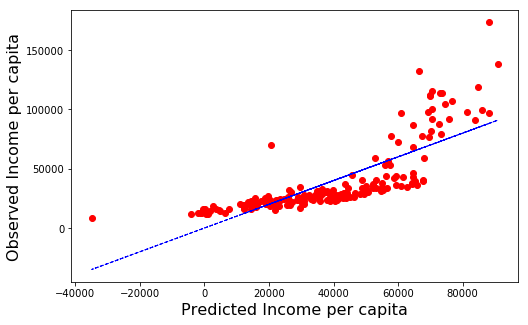

In [16]:
y_fit = lm3.predict(ex2)   
plt.figure(figsize = (8,5))
plt.plot(y_fit,ex2.IncomePerCapita,'or', markersize = 6) 
plt.plot(y_fit,y_fit,'--b', linewidth = 1)                
plt.xlabel('Predicted Income per capita', fontsize = 16)
plt.ylabel('Observed Income per capita', fontsize = 16)

### R-squared increased. The impact of the percentage of population in private insurance and in both insurances are statistically significant (p-value < 5%). The fitted line looks good. It is not perfect, but make sense.

## EX 3, Polynomial fit (40+30pt -- 4+5+3$\times$4+5+3$\times$3+5+30)

### Try to fit y with a polynomial $$\hat y(x,w) = \sum\limits_{i=1}^M w_i\cdot x^i$$ with the given dataset 'H33.csv'

### Tasks:
* (a) Draw the scatter plot of x and y, guess what polynomial could be the best choice. (The name "x1" denotes $x^1$.)
* (b) Create new columns in data frame to contain the information of $x^2, x^3, x^4$
* (c) Try to fit y with polynomial of x with order 1, 2, 3, 4, respectively
    * For each model, store your fitted parameters as well as your $R^2$
* (d) Report the $R^2$, plot it and observe how it changes
* (e) Create a figure with four (4) subfigures, one for each polynomial degree M = 1, 2, 3, 4. In each subfigure:
    * (e.1) Draw the original scatter plot of x1 and y
    * (e.2) Plot the curve of true function $f(x) = 9x^2 - x + 1$
    * (e.3) Plot your fitted curve of degree M, observe how our model fits the data as M increases
* (f) Based on the plot, which model(s) fits the true curve best? Then provide the best coefficients $\hat w$
### Extra credit
* (g) In each subfigure:
    * (g.1) Pick an x value (at your discretion) $x_0$, then locate the y value both on your fitted curve and on our function curve ($f(x_0)$)
    * (g.2) Mark these two points with a small diamond, then draw a dashed line connecting them, showing "prediction error"
    * (g.3) Repeat g.1 and g.2 up to ten times (i.e. select up to ten random different future points and predict their values, compare your prediction with the true value), then:
        * Compute the average sum of squares of errors $E = \frac{\sum_i^n (y_i - f(x_i))^2}{n}$ ($x_i$ denotes your future points), mention it in your subfigure's title (**Be sure to use the SAME future points for ALL 4 models when you calculate prediction error**)
        * Which model has the smallest average error $E$? Does this fitted polynomial coincides with the M you picked in part f?

In [17]:
ex3 = pd.read_csv('data/H33.csv')

In [18]:
ex3

,y,x1
0,2.613388,-0.50
1,2.170351,-0.32
2,0.049546,-0.14
3,1.158258,0.04
4,1.397567,0.22
5,1.773240,0.40


(a) Draw the scatter plot of x and y, guess what polynomial could be the best choice. (The name "x1" denotes  x1x1 .)

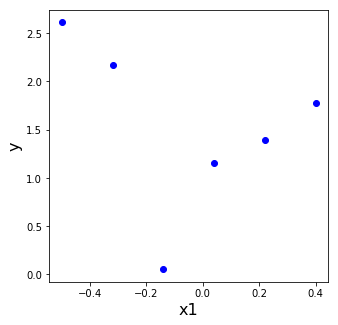

In [19]:
plt.figure(figsize = (5,5))
plt.plot(ex3.x1, ex3.y, 'bo', markersize = 6)
plt.xlabel('x1', fontsize = 16)
plt.ylabel('y', fontsize = 16)

### From the shape of the scatter plot, I guess that 2 degree pollynomial could be the best choice.

(b) Create new columns in data frame to contain the information of  x2,x3,x4x2,x3,x4

In [20]:
ex3 = pd.DataFrame([ex3.y] + [np.array(ex3.x1**(i+1)) for i in range(4)]).T 
ex3.columns = ['y']+['x%d'%(i+1) for i in range(4)]  
ex3

,y,x1,x2,x3,x4
0,2.613388,-0.50,0.2500,-0.125000,0.062500
1,2.170351,-0.32,0.1024,-0.032768,0.010486
2,0.049546,-0.14,0.0196,-0.002744,0.000384
3,1.158258,0.04,0.0016,0.000064,0.000003
4,1.397567,0.22,0.0484,0.010648,0.002343
5,1.773240,0.40,0.1600,0.064000,0.025600


(c) Try to fit y with polynomial of x with order 1, 2, 3, 4, respectively 

For each model, store your fitted parameters as well as your  R2R2

In [21]:
def MultiReg(data, degree):
    # create a string for controlling the number of x_i
    string = ''
    for i in range(degree):
        string += str(i+1) 
    formula = 'y ~ x' + ' + x'.join(string) 
    # Perform regression
    lm = smf.ols(formula = formula, data = data).fit()
    return lm.rsquared, lm.params


# Run the function and store the results separately
R2 = []
Params = []
for M in range(1,5):
    a,b = MultiReg(ex3,M)  
    R2.append(a)
    Params.append(b)

(d) Report the  R2R2 , plot it and observe how it changes

R2 = [0.1047961716238156, 0.65125881311682732, 0.66574886312199211, 0.80198630229302026]


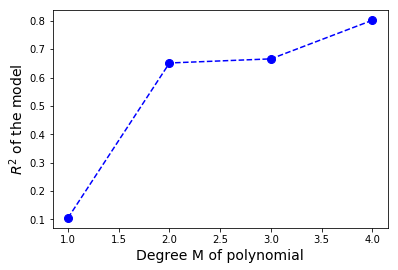

In [22]:
print('R2 = {}'.format(R2))
plt.plot(range(1,5),R2,'bo--', markersize = 8)
plt.xlabel('Degree M of polynomial', fontsize = 14)
plt.ylabel('$R^2$ of the model', fontsize = 14)
plt.show()

### R2 increases sharply when M change from 1 to 2, then the change slows down. The increase is not obvious when M increases from 2 to 3.

* (e) Create a figure with four (4) subfigures, one for each polynomial degree M = 1, 2, 3, 4. In each subfigure:
* (e.1) Draw the original scatter plot of x1 and y
* (e.2) Plot the curve of true function $f(x) = 9x^2 - x + 1$
* (e.3) Plot your fitted curve of degree M, observe how our model fits the data as M increases

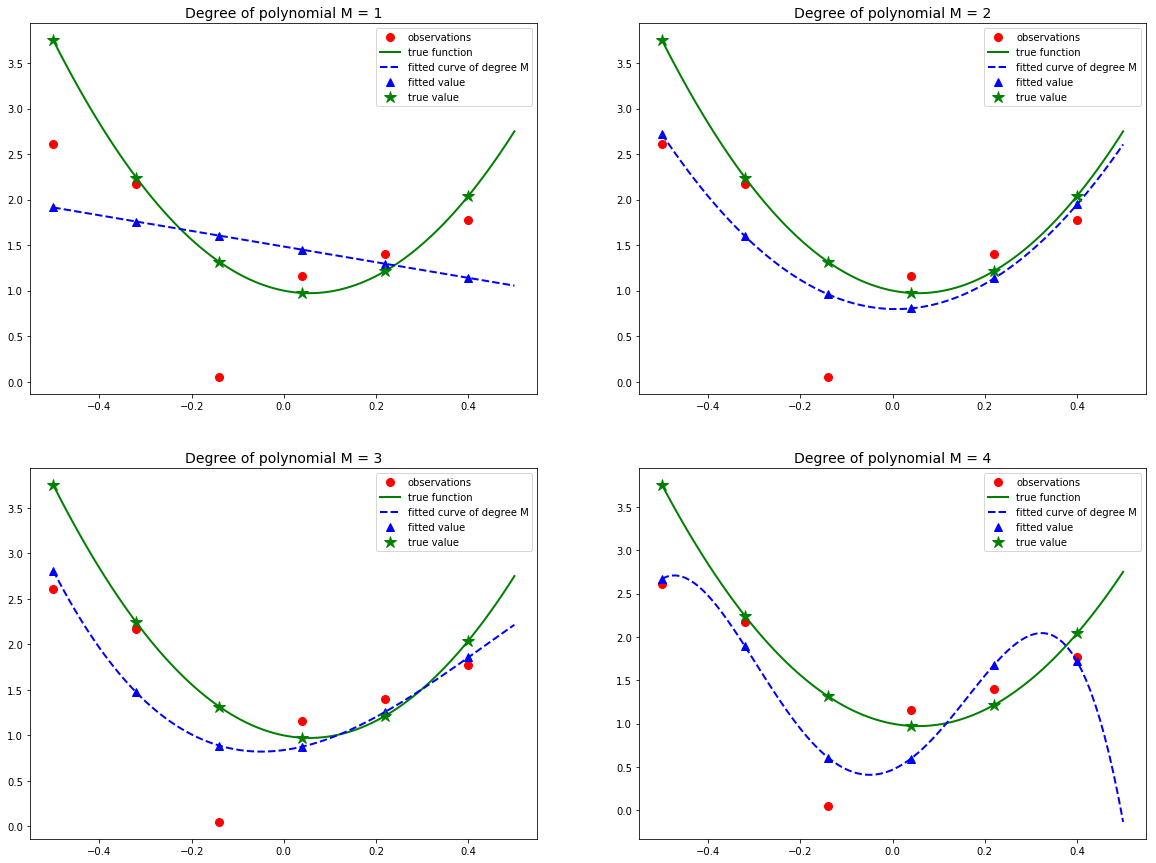

In [23]:
plt.figure(figsize = (20,15))

f = lambda x: 9 * x**2 - x + 1

for M in range(1,5):
    plt.subplot(220+M)   # Plot subfigure, M controls the location
    x_fit = np.linspace(-0.5,0.5,100)  # For smoothing the fitted curve
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(M+1)]).T,  
                         columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)  

    y_future = 0
    x_future = ex3.x1
    for i in range(len(Params[M-1])):
        y_future += Params[M-1][i] * (x_future**i)
    plt.plot(ex3.x1, ex3.y, 'ro', markersize = 8, label = 'observations')   
    plt.plot(x_fit, f(x_fit), 'g-', lw = 2, label = 'true function')             
    plt.plot(x_fit, y_fit, 'b--', lw = 2, label = 'fitted curve of degree M')             
    plt.plot(x_future, y_future, 'b^', markersize = 8, label = 'fitted value')       
    plt.plot(x_future, f(x_future), 'g*', markersize = 12, label = 'true value')     
    plt.title('Degree of polynomial M = %d'%(M), fontsize = 14)
    plt.legend()

### From the model we saw that the fit is better when M is 2 or 3. Although the improvement is not obvious when M increses from 2 to 3. When M equals to 4, there is a over fitting of the model.

(f) Based on the plot, which model(s) fits the true curve best? Then provide the best coefficients  ŵ w^ 

### The second model (Degree = 2) fits the true curve best.

In [24]:
print('best coefficient w is\n {}'.format(Params[1]))

best coefficient w is
 Intercept    0.797871
x1          -0.112869
x2           7.459218
dtype: float64


* (g) In each subfigure:
    * (g.1) Pick an x value (at your discretion) $x_0$, then locate the y value both on your fitted curve and on our function curve ($f(x_0)$)
    * (g.2) Mark these two points with a small diamond, then draw a dashed line connecting them, showing "prediction error"

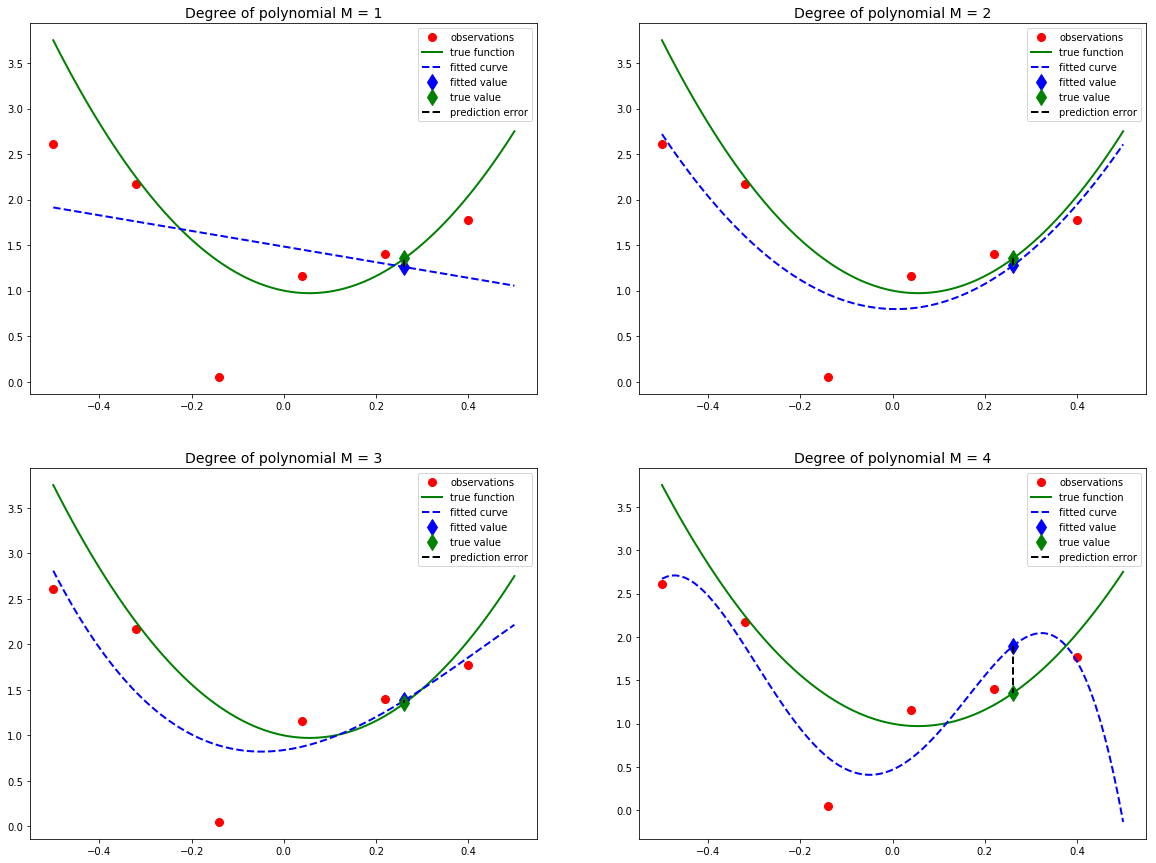

In [25]:
np.random.seed(1000)
plt.figure(figsize = (20,15))

f = lambda x: 9* x**2 - x + 1


x_future = np.random.rand(1) * 0.4

for M in range(1,5):
    plt.subplot(220+M)  
    x_fit = np.linspace(-0.5,0.5,100) 
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(M+1)]).T,  
                         columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)  
    y_future = 0
    for i in range(len(Params[M-1])):
        y_future += Params[M-1][i] * (x_future**i)
    plt.plot(ex3.x1, ex3.y, 'ro', markersize = 8, label = 'observations')   
    plt.plot(x_fit, f(x_fit), 'g-', lw = 2, label = 'true function')            
    plt.plot(x_fit, y_fit, 'b--', lw = 2, label = 'fitted curve')               
    plt.plot(x_future, y_future, 'bd', markersize = 12, label = 'fitted value')      
    plt.plot(x_future, f(x_future), 'gd', markersize = 12, label = 'true value')  
    plt.plot([x_future,x_future], [y_future, f(x_future)], 'k--', lw = 2, label = 'prediction error')
    plt.title('Degree of polynomial M = %d'%(M), fontsize = 14)
    plt.legend()

* (g.3) Repeat g.1 and g.2 up to ten times (i.e. select up to ten random different future points and predict their values, compare your prediction with the true value), then:
* Compute the average sum of squares of errors $E = \frac{\sum_i^n (y_i - f(x_i))^2}{n}$ ($x_i$ denotes your future points), mention it in your subfigure's title (**Be sure to use the SAME future points for ALL 4 models when you calculate prediction error**)
* Which model has the smallest average error $E$? Does this fitted polynomial coincides with the M you picked in part f?

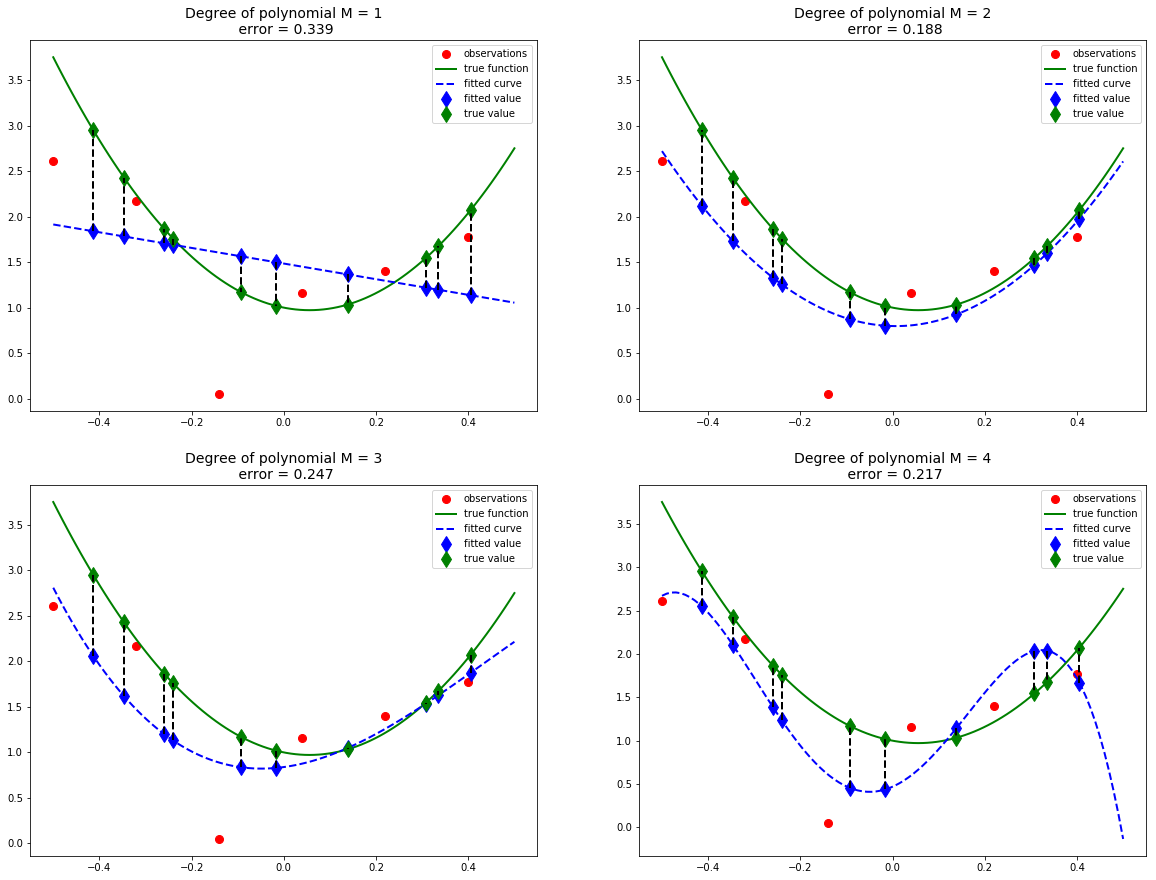

In [26]:
np.random.seed(1000)
plt.figure(figsize = (20,15))

f = lambda x: 9* x**2 - x + 1

x_future = random.uniform(-0.45, 0.45, 10)

for M in range(1,5):
    plt.subplot(220+M)   # Plot subfigure, M controls the location
    x_fit = np.linspace(-0.5,0.5,100)  # For smoothing the fitted curve
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(M+1)]).T,  # Generate our fitted curve
                         columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)  # 1 means computation runs row-wise
    # Pay attention how we obtain the results by controlling the axes on which the operations are performed

    y_future = 0
    for i in range(len(Params[M-1])):
        y_future += Params[M-1][i] * (x_future**i)
    plt.plot(ex3.x1, ex3.y, 'ro', markersize = 8, label = 'observations')   
    plt.plot(x_fit, f(x_fit), 'g-', lw = 2, label = 'true function')            
    plt.plot(x_fit, y_fit, 'b--', lw = 2, label = 'fitted curve')               
    plt.plot(x_future, y_future, 'bd', markersize = 12, label = 'fitted value')      
    plt.plot(x_future, f(x_future), 'gd', markersize = 12, label = 'true value')  
    plt.plot([x_future,x_future], [y_future, f(x_future)], 'k--', lw = 2)
    error = sum((y_future - f(x_future))**2) / len(x_future)
    plt.title('Degree of polynomial M = %d\n error = %.3f'%(M,error), fontsize = 14)
    plt.legend()
    

### The 2 degree polynomial model has the smallest average error E. This fitted polynomial coincides with the M you picked in part f.